<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Визуализация-решающих-деревьев" data-toc-modified-id="Визуализация-решающих-деревьев-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Визуализация решающих деревьев</a></span><ul class="toc-item"><li><span><a href="#Визуализация-для-случайного-леса" data-toc-modified-id="Визуализация-для-случайного-леса-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация для случайного леса</a></span></li></ul></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Важность признаков</a></span><ul class="toc-item"><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic regression</a></span></li></ul></li><li><span><a href="#Прочие-методы-определения-важности-и-отбора-признаков" data-toc-modified-id="Прочие-методы-определения-важности-и-отбора-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Прочие методы определения важности и отбора признаков</a></span><ul class="toc-item"><li><span><a href="#rfe" data-toc-modified-id="rfe-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>rfe</a></span></li><li><span><a href="#rfecv" data-toc-modified-id="rfecv-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>rfecv</a></span></li><li><span><a href="#Permutation-feature-importance" data-toc-modified-id="Permutation-feature-importance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Permutation feature importance</a></span></li><li><span><a href="#Прочее" data-toc-modified-id="Прочее-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Прочее</a></span></li></ul></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Градиентный бустинг</a></span><ul class="toc-item"><li><span><a href="#Материалы-по-теме" data-toc-modified-id="Материалы-по-теме-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Материалы по теме</a></span></li><li><span><a href="#Реализация-в-sklearn" data-toc-modified-id="Реализация-в-sklearn-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Реализация в sklearn</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Early-stopping" data-toc-modified-id="Early-stopping-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Early stopping</a></span></li></ul></li><li><span><a href="#Прочие-(основные)-реализации-градиентного-бустинга" data-toc-modified-id="Прочие-(основные)-реализации-градиентного-бустинга-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Прочие (основные) реализации градиентного бустинга</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

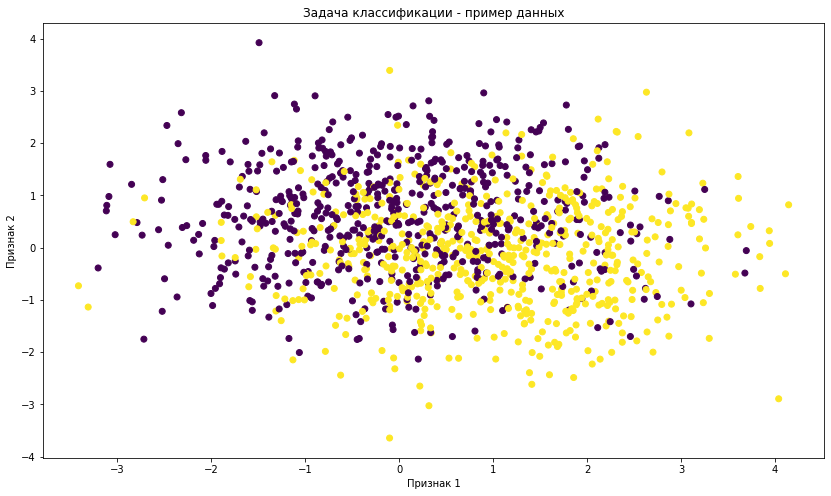

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1200, noise=1, random_state=42)

# Визуализация данных
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Задача классификации - пример данных')
plt.show()

In [3]:
# Функция для визуализации границы принятия решений
def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Визуализация решающих деревьев

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=2)
clf_dt.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
from sklearn.tree import plot_tree, export_graphviz
from graphviz import Source
from IPython.display import SVG

In [45]:
np.unique(X[:,0]).shape

(1200,)

In [46]:
np.unique(X[:,1]).shape

(1200,)

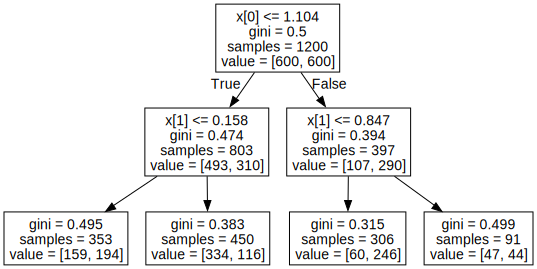

In [18]:
graph = Source(export_graphviz(clf_dt, out_file=None))
SVG(graph.pipe(format='svg'))

## Визуализация для случайного леса

In [19]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=2)
clf_rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=42)

In [20]:
print('Кол-во деревьев: %d' % len(clf_rf.estimators_))
clf_rf.estimators_

Кол-во деревьев: 100


[DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1914837113),
 DecisionTreeClassifier(max_depth=2, max_feat

Дерево с индексом 0:


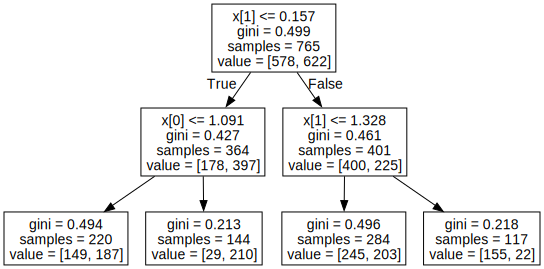

In [21]:
print('Дерево с индексом 0:')
graph = Source(export_graphviz(clf_rf.estimators_[0], out_file=None))
SVG(graph.pipe(format='svg'))

Дерево с индексом 1:


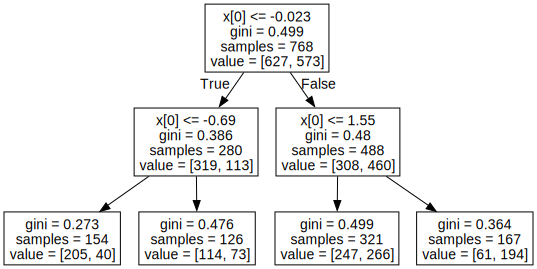

In [22]:
print('Дерево с индексом 1:')
graph = Source(export_graphviz(clf_rf.estimators_[1], out_file=None))
SVG(graph.pipe(format='svg'))

... и так далее

# Важность признаков

## Decision tree

In [23]:
print('Важность признаков Decision Tree: %s' % clf_dt.feature_importances_)

Важность признаков Decision Tree: [0.56723271 0.43276729]


The feature importances. The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

That reduction or weighted information gain is defined as :

The weighted impurity decrease equation is the following:

- N_t / N * (impurity - N_t_R / N_t * right_impurity
                      - N_t_L / N_t * left_impurity)

where
- N is the total number of samples
- N_t is the number of samples at the current node
- N_t_L is the number of samples in the left child
- N_t_R is the number of samples in the right child.

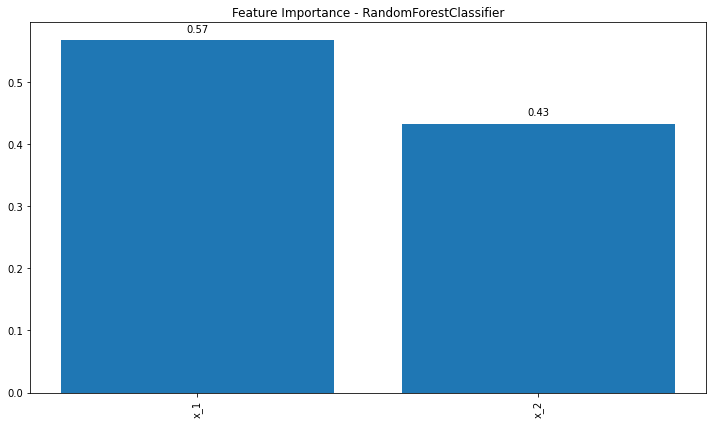

In [24]:
feature_names = ['x_1','x_2']

# Получение важности признаков
importances = clf_dt.feature_importances_

# Сортировка признаков по их важности
indices = np.argsort(importances)[::-1]

# Визуализация feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - RandomForestClassifier")
plt.bar(range(X.shape[1]), importances[indices], align="center")
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, f"{importances[indices][i]:.2f}", ha='center', va='bottom')
    
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

## Random forest

In [27]:
print('Важность признаков Random Forest: %s' % clf_rf.feature_importances_)

Важность признаков Random Forest: [0.54739119 0.45260881]


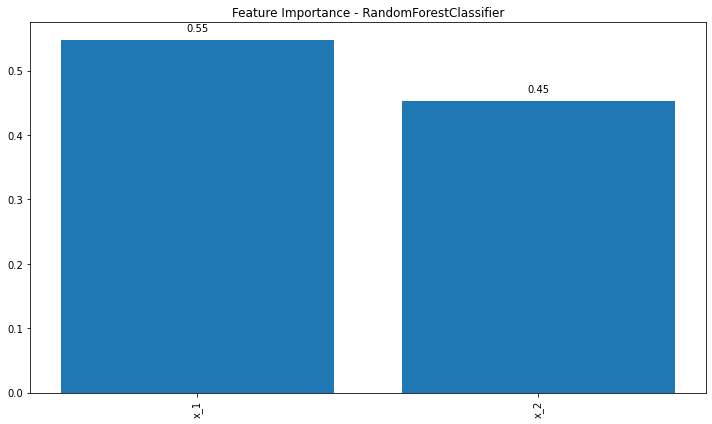

In [28]:
feature_names = ['x_1','x_2']

# Получение важности признаков
importances = clf_rf.feature_importances_

# Сортировка признаков по их важности
indices = np.argsort(importances)[::-1]

# Визуализация feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - RandomForestClassifier")
plt.bar(range(X.shape[1]), importances[indices], align="center")
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.01, f"{importances[indices][i]:.2f}", ha='center', va='bottom')
    
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

## Logistic regression

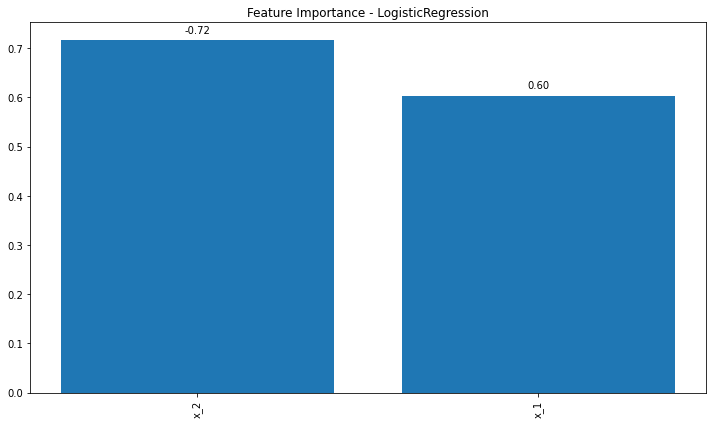

In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Создание и обучение модели LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X, y)

# Получение коэффициентов признаков
importances = clf_lr.coef_[0]

# Сортировка признаков по их коэффициентам
indices = np.argsort(np.abs(importances))[::-1]

# Визуализация feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - LogisticRegression")
plt.bar(range(X.shape[1]), np.abs(importances[indices]), align="center")

# Добавление числовых значений на столбцы    
for i, v in enumerate(np.abs(importances[indices])):
    plt.text(i, v + 0.01, f"{importances[indices][i]:.2f}", ha='center', va='bottom')
    
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

In [32]:
0.72/(0.72+0.6), 0.6/(0.72+0.6)

(0.5454545454545455, 0.4545454545454546)

# Прочие методы определения важности и отбора признаков

## rfe

- https://habr.com/ru/companies/otus/articles/528676/

In [17]:
from sklearn.feature_selection import RFE

In [18]:
selector = RFE(clf_rf, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True])

In [19]:
selector.ranking_

array([1, 1])

## rfecv

In [20]:
from sklearn.feature_selection import RFECV

In [21]:
selector = RFECV(clf_rf, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True])

In [22]:
selector.ranking_

array([1, 1])

## Permutation feature importance

In [34]:
from sklearn.inspection import permutation_importance

- df_before - auc_before
- df_after (здесь переменная x1 зашафлена) - auc_after

- если auc_before - auc_after ~= 0, то значит x1 - не сильно важна
- если auc_before - auc_after >> 0, то значит x1 - важна

In [35]:
result = permutation_importance(clf_rf, X, y, n_repeats=10, random_state=0)

In [36]:
result

{'importances_mean': array([0.12841667, 0.09375   ]),
 'importances_std': array([0.01085543, 0.0106735 ]),
 'importances': array([[0.125     , 0.1275    , 0.1275    , 0.11916667, 0.12666667,
         0.1225    , 0.155     , 0.12083333, 0.14166667, 0.11833333],
        [0.09333333, 0.095     , 0.08166667, 0.11833333, 0.07833333,
         0.0975    , 0.08583333, 0.095     , 0.10166667, 0.09083333]])}

In [37]:
result.importances_mean

array([0.12841667, 0.09375   ])

In [38]:
result.importances_std

array([0.01085543, 0.0106735 ])

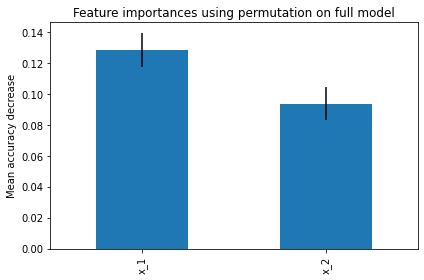

In [39]:
importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Прочее

Больше способов в sklearn.feature_selection https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

- clf = RandomForestClassifier()
- x1, x2, ... , x100</br>

- Отфильтровали топ-50:
- x1, x2, ... , x50</br>

- Обучаем заново и смотрим на feature_importance:
- x2, x1, ... , x10</br>

# Градиентный бустинг

## Материалы по теме

Дополнительные материалы по теме:
- Что такое градиентный бустинг? | Григорий Будорагин | karpov.courses https://www.youtube.com/watch?v=G9d2likA-_E
- Градиентный Бустинг с нуля на Python https://www.youtube.com/watch?v=J56xpgadgzY
- Live-coding Gradient Boosting from scratch https://colab.research.google.com/drive/1CssD7R7BfPB5GtsA6NYHiDlSOzrtv7aC?usp=sharing
- Open Data Science. Градиентный бустинг https://habr.com/ru/companies/ods/articles/327250/
- А.Дьяконов. Градиентный бустинг (методичка) https://alexanderdyakonov.files.wordpress.com/2017/06/book_boosting_pdf.pdf
- А.Дьяконов. Градиентный бустинг (презентация) http://www.machinelearning.ru/wiki/images/7/7a/PZAD2017_06_gradboosting.pdf

А также материалы с прошлого семинара:
- Tree based methods (Stanford) https://hastie.su.domains/MOOC-Slides/trees.pdf
- An Introduction to Statistical Learning. Chapter 8 'Tree Based Methods' https://hastie.su.domains/ISLR2/ISLRv2_website.pdf

<img src='https://i.ytimg.com/vi/0B26MGdtoKk/maxresdefault.jpg'>

<img src='https://www.researchgate.net/profile/Pierrick-Piette/publication/338195250/figure/fig17/AS:840759452389386@1577464082964/Pseudocode-of-the-Gradient-Tree-Boosting-algorithm-Source-Friedman-2002.ppm'>

- f(x) = f(x_prev) + grad*learning_rate
- decision ~ gradient

- mse_loss = (y - y_hat)**2
- grad(mse_loss) = 2 *(y - y_hat)

----------

## Реализация в sklearn

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators=100)
clf_gb.fit(X,y)

GradientBoostingClassifier()

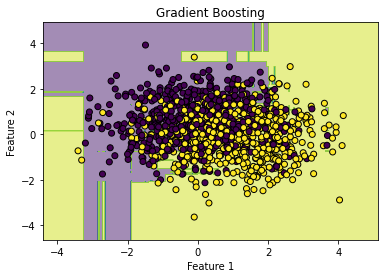

In [48]:
plot_decision_boundary(clf_gb, 'Gradient Boosting')

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

n_estimators = 1000
clf_gb = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=n_estimators)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [52]:
clf_gb.n_estimators

1000

In [53]:
clf_gb.n_estimators_

1000

In [61]:
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm

train_auc = list()
test_auc = list()

for i, t in tqdm(enumerate(clf_gb.staged_predict_proba(X_train))):
    y_pred = t[:,1]
    train_auc.append(roc_auc_score(y_train, y_pred))
    
for i, t in tqdm(enumerate(clf_gb.staged_predict_proba(X_test))):
    y_pred = t[:,1]
    test_auc.append(roc_auc_score(y_test, y_pred))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [62]:
for i, t in tqdm(enumerate(clf_gb.staged_predict_proba(X_train))):
    y_pred = t[:,1]
    print(i, roc_auc_score(y_train, y_pred))

0it [00:00, ?it/s]

0 0.7780495963352685
1 0.7884757120827286
2 0.7919340756531206
3 0.7921665230406387
4 0.7973370600507983
5 0.8047810458998548
6 0.8044522178882438
7 0.8073067851959361
8 0.8115787146226415
9 0.8121229816763427
10 0.8126389014876634
11 0.8127579599056604
12 0.8145891917634253
13 0.8161596289912918
14 0.8178689677068215
15 0.8202359624455733
16 0.8229913144049346
17 0.8249614477503627
18 0.8260839985486211
19 0.8272292271407838
20 0.8286295809143687
21 0.8290632937227866
22 0.8317619511973875
23 0.8323629127358491
24 0.8351296035921627
25 0.835611506712627
26 0.8369494965529753
27 0.8390868786284469
28 0.840711175616836
29 0.8405382574383164
30 0.8410428383526851
31 0.8420661738026125
32 0.843316287191582
33 0.8453601233671988
34 0.8463976324383164
35 0.8473019094702468
36 0.8481409878447026
37 0.8497397723149491
38 0.8506468840711177
39 0.8514632846516692
40 0.8532151442307692
41 0.8542639921988389
42 0.8548592842888244
43 0.8553270137880986
44 0.8559960087082727
45 0.8572121054063861
4

382 0.9946168586719885
383 0.9947019003991292
384 0.9947132392960812
385 0.9948322977140784
386 0.9948379671625543
387 0.9948776533018868
388 0.994911669992743
389 0.9950420673076923
390 0.9951838035195935
391 0.9952376632801161
392 0.9953964078374457
393 0.9954587717706821
394 0.99544743287373
395 0.9955268051523948
396 0.9956515330188679
397 0.9957422441944848
398 0.9958556331640058
399 0.9958556331640058
400 0.9959746915820028
401 0.9960143777213353
402 0.996088080551524
403 0.9960597333091438
404 0.9960937499999999
405 0.9961277666908562
406 0.9961674528301887
407 0.9961731222786647
408 0.9961901306240929
409 0.9961617833817127
410 0.9961731222786646
411 0.9963545446298985
412 0.9963545446298985
413 0.996535966981132
414 0.996643686502177
415 0.9966890420899855
416 0.9966663642960814
417 0.9967967616110305
418 0.9968307783018868
419 0.9969328283744557
420 0.9971199201741656
421 0.9971199201741656
422 0.9973353592162554
423 0.9973637064586356
424 0.9973523675616834
425 0.99735236756

826 1.0
827 1.0
828 1.0
829 1.0
830 1.0
831 1.0
832 1.0
833 1.0
834 1.0
835 1.0
836 1.0
837 1.0
838 1.0
839 1.0
840 1.0
841 1.0
842 1.0
843 1.0
844 1.0
845 1.0
846 1.0
847 1.0
848 1.0
849 1.0
850 1.0
851 1.0
852 1.0
853 1.0
854 1.0
855 1.0
856 1.0
857 1.0
858 1.0
859 1.0
860 1.0
861 1.0
862 1.0
863 1.0
864 1.0
865 1.0
866 1.0
867 1.0
868 1.0
869 1.0
870 1.0
871 1.0
872 1.0
873 1.0
874 1.0
875 1.0
876 1.0
877 1.0
878 1.0
879 1.0
880 1.0
881 1.0
882 1.0
883 1.0
884 1.0
885 1.0
886 1.0
887 1.0
888 1.0
889 1.0
890 1.0
891 1.0
892 1.0
893 1.0
894 1.0
895 1.0
896 1.0
897 1.0
898 1.0
899 1.0
900 1.0
901 1.0
902 1.0
903 1.0
904 1.0
905 1.0
906 1.0
907 1.0
908 1.0
909 1.0
910 1.0
911 1.0
912 1.0
913 1.0
914 1.0
915 1.0
916 1.0
917 1.0
918 1.0
919 1.0
920 1.0
921 1.0
922 1.0
923 1.0
924 1.0
925 1.0
926 1.0
927 1.0
928 1.0
929 1.0
930 1.0
931 1.0
932 1.0
933 1.0
934 1.0
935 1.0
936 1.0
937 1.0
938 1.0
939 1.0
940 1.0
941 1.0
942 1.0
943 1.0
944 1.0
945 1.0
946 1.0
947 1.0
948 1.0
949 1.0
950 1.0


In [63]:
test_auc

[0.7573493083003953,
 0.7672461709486167,
 0.7654088438735178,
 0.7667212203557312,
 0.7672461709486166,
 0.7613173171936759,
 0.7601902173913044,
 0.7560369318181818,
 0.7619194664031621,
 0.7603137351778656,
 0.7604372529644269,
 0.7600049407114624,
 0.7653934041501976,
 0.7640501482213439,
 0.7649610918972332,
 0.7659337944664031,
 0.7648838932806323,
 0.7650074110671937,
 0.763370800395257,
 0.7612709980237153,
 0.7659801136363636,
 0.7629539278656127,
 0.7649919713438735,
 0.7635406373517787,
 0.7634943181818181,
 0.7646986166007905,
 0.7647294960474308,
 0.7650074110671936,
 0.7632472826086956,
 0.7638957509881423,
 0.7641273468379448,
 0.7639575098814229,
 0.7635406373517787,
 0.7636487154150198,
 0.7635560770750989,
 0.7634943181818182,
 0.7632164031620553,
 0.7635251976284584,
 0.7633090415019763,
 0.7640192687747035,
 0.7615952322134387,
 0.7611629199604742,
 0.7614408349802371,
 0.7614717144268774,
 0.7620584239130435,
 0.7615643527667985,
 0.7613481966403163,
 0.76147171442

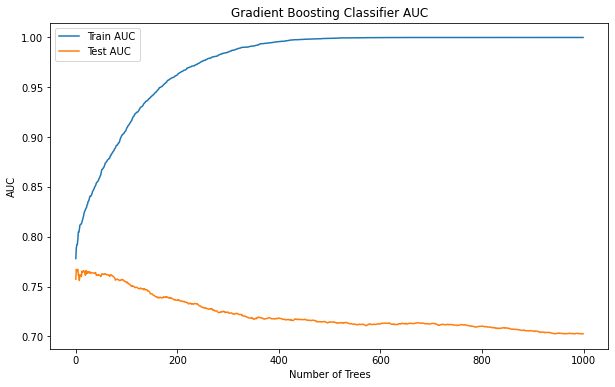

In [55]:
# Создание подграфиков
fig, ax = plt.subplots(figsize=(10, 6))

# График качества на тренировочном наборе
ax.plot(range(n_estimators), train_auc, label='Train AUC')

# График качества на тестовом наборе
ax.plot(range(n_estimators), test_auc, label='Test AUC')

# Настройка осей и легенды
ax.set_xlabel('Number of Trees')
ax.set_ylabel('AUC')
ax.set_title('Gradient Boosting Classifier AUC')
ax.legend()

# Отображение графика
plt.show()

## Random forest

In [56]:
train_auc = list()
test_auc = list()

for i in tqdm(range(10,1000,10)):
    clf_rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=i)
    clf_rf.fit(X,y)
    
    y_pred = clf_rf.predict_proba(X_train)[:,1]
    train_auc.append(roc_auc_score(y_train, y_pred))

    y_pred = clf_rf.predict_proba(X_test)[:,1]
    test_auc.append(roc_auc_score(y_test, y_pred))

  0%|          | 0/99 [00:00<?, ?it/s]

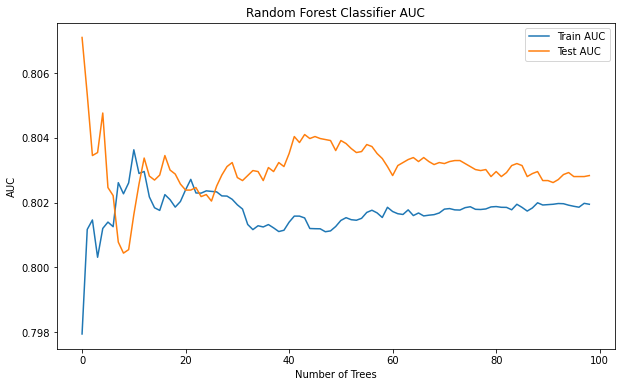

In [57]:
# Создание подграфиков
fig, ax = plt.subplots(figsize=(10, 6))

# График качества на тренировочном наборе
ax.plot(range(len(train_auc)), train_auc, label='Train AUC')

# График качества на тестовом наборе
ax.plot(range(len(test_auc)), test_auc, label='Test AUC')

# Настройка осей и легенды
ax.set_xlabel('Number of Trees')
ax.set_ylabel('AUC')
ax.set_title('Random Forest Classifier AUC')
ax.legend()

# Отображение графика
plt.show()

## Early stopping

"n_iter_no_change"

In [ ]:
# clf_gb = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=n_estimators)

In [82]:
n_estimators

1000

In [93]:
clf_gb = GradientBoostingClassifier(random_state=42, max_depth=3, n_estimators=200, n_iter_no_change=50,
                                    learning_rate=0.01)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           n_iter_no_change=50, random_state=42)

In [94]:
# 50 trees with learning_rate = 0.1
# ~
# 500 with learning_rate = 0.01

In [95]:
clf_gb.n_estimators

200

In [96]:
clf_gb.n_estimators_

146

In [97]:
len(clf_gb.estimators_)

146

In [99]:
# # Random forest
# print(len(clf_rf.estimators_))
# clf_rf.estimators_

# X

# for _ in range(n_estimators):
#     DecisionTreeClassifier.fit(X[subsample_i, subsample_j], y[subsample_j])

# RandomForest = agg(trees)

990


[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113),
 DecisionTreeClassifier(max_depth=3, max_feat

In [100]:
# Gradient Boosting
clf_gb.estimators_
# for _ in range(n_estimators):
#     DecisionTreeClassifier.fit(X[subsample_i, subsample_j], y[subsample_j])
# вместо этого используются регрессионные деревья решений:
#     DecisionTreeRegressor.fit(X[subsample_i, subsample_j], grad(x))
# GradientBoosting = agg(trees)

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7FA2992E1D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
       

0it [00:00, ?it/s]

0it [00:00, ?it/s]

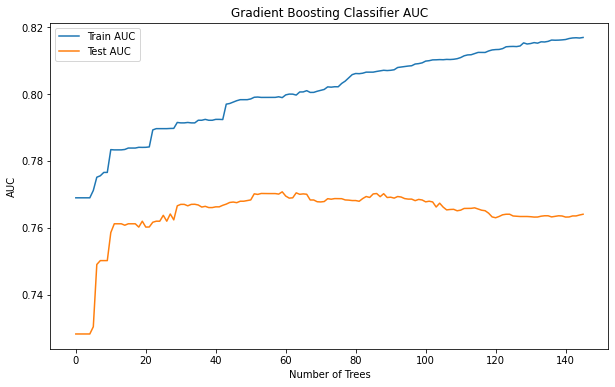

In [80]:
train_auc = list()
test_auc = list()

for i, t in tqdm(enumerate(clf_gb.staged_predict_proba(X_train))):
    y_pred = t[:,1]
    train_auc.append(roc_auc_score(y_train, y_pred))
    
for i, t in tqdm(enumerate(clf_gb.staged_predict_proba(X_test))):
    y_pred = t[:,1]
    test_auc.append(roc_auc_score(y_test, y_pred))
    
# Создание подграфиков
fig, ax = plt.subplots(figsize=(10, 6))

# График качества на тренировочном наборе
ax.plot(range(clf_gb.n_estimators_), train_auc, label='Train AUC')

# График качества на тестовом наборе
ax.plot(range(clf_gb.n_estimators_), test_auc, label='Test AUC')

# Настройка осей и легенды
ax.set_xlabel('Number of Trees')
ax.set_ylabel('AUC')
ax.set_title('Gradient Boosting Classifier AUC')
ax.legend()

# Отображение графика
plt.show()

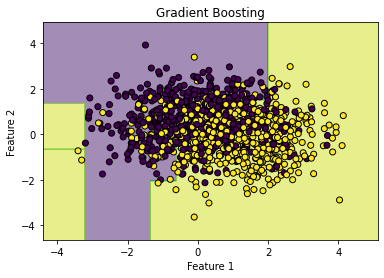

In [81]:
plot_decision_boundary(clf_gb, 'Gradient Boosting')

# Прочие (основные) реализации градиентного бустинга

- XGBoost
- LightGBM
- CatBoost